## Reference:

The setup of the metric, the Christoffel symbols, the Riemann, and Ricci tensors are duplicated from 
https://github.com/wojciechczaja/GraviPy/blob/master/docs/GraviPy-tutorial.ipynb

In [1]:
import sympy as sp

from sympy import symbols, diag, sin, cos

from sympy import init_printing
init_printing()

from IPython.display import display, Math

from gravipy.tensorial import Coordinates, MetricTensor,\
Christoffel, Riemann, Ricci, Tensor, variations, All

In [2]:
# define symbols
t, x, y, z, rho0, b, G = symbols('t, x, y, z, rho_0, b, G',real=True)
n = sp.Rational(2,3)

#### The metric for the matter dominated universe

In [3]:
# the Coordinates class
x = Coordinates('\chi', [t, x, y, z])

## define a matrix equal to the metric
b = (6*sp.pi*G*rho0)**sp.Rational(1,3)
a = b*t**n
Metric = diag(-1,a**2,a**2,a**2)

## create the metric
g = MetricTensor('g', x, Metric)

## create the Christoffel symbols
Ga = Christoffel('Ga', g)

## The Riemann tensor
Rm = Riemann('Rm', g)

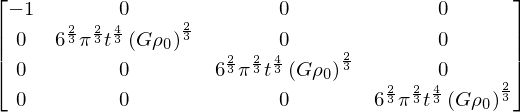

In [4]:
## show the metric
g(All,All)

In [5]:
## the left hand side of LGT 
## divergence of the Riemann tensor
DRm = lambda i, k, l:\
(\
 ## i,j,k,l are the Riemann tensor indices 
 ## Note: here the convention of the paper is not followed
 ## Indices refer to space-time and not Lorentz frame
 ## m is the component of the covariant derivative
 ## -m and -j means the inverse metric g^{mj} is used not g_{mj}
 sum(Rm.covariantD(i, j, k, l, m)*g(-m,-j)\
      for m, j in list(variations(range(1,5),2,True))\
 )\
).simplify()

In [6]:
## introduce the density and pressure
rho = rho0/a**3
p   = 0

In [7]:
## Create the energy-momentum tensor
## first make a matrix
T_temp = diag(-rho,p,p,p)

In [8]:
## convert the matrix to T^{\mu}_{\nu}
T = Tensor('T',2,g,components=T_temp,components_type=(-1,1))

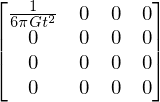

In [9]:
## display the energy-momentum tensor
T(All,All)

In [10]:
## the right hand side of LGT field equation
## LGT source 
J = lambda i, k, l: -4*sp.pi*G*(\
                    T.covariantD(i,k,l) - T.covariantD(i,l,k)\
                               )

<IPython.core.display.Math object>

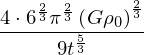

<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

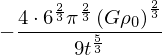

<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

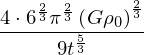

<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

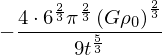

<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

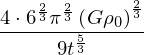

<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

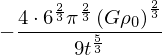

<IPython.core.display.Math object>

--


In [11]:
## display the source and
## make sure the metric is the solution of LGT
for i, k, l in list(variations(range(1, 5), 3, True)):
    val = (DRm(i,k,l) - J(i,k,l)).simplify()
    if J(i,k,l) != 0:
        display(Math(r'$J_{%d%d%d}:$'%(i,k,l)),(J(i,k,l)).simplify())
        display(Math(r'\nabla^{\nu}R_{%d\nu%d%d}-J_{%d%d%d}:'\
                     %(i,k,l,i,k,l)),val)
        print("--")
    


In [12]:
## make sure that all of the components of the
## divergence of the Riemann tensor are zero
not any([(DRm(i,k,l)-J(i,k,l)).simplify()\
         for i, k, l in list(variations(range(1, 5), 3, True))])

True